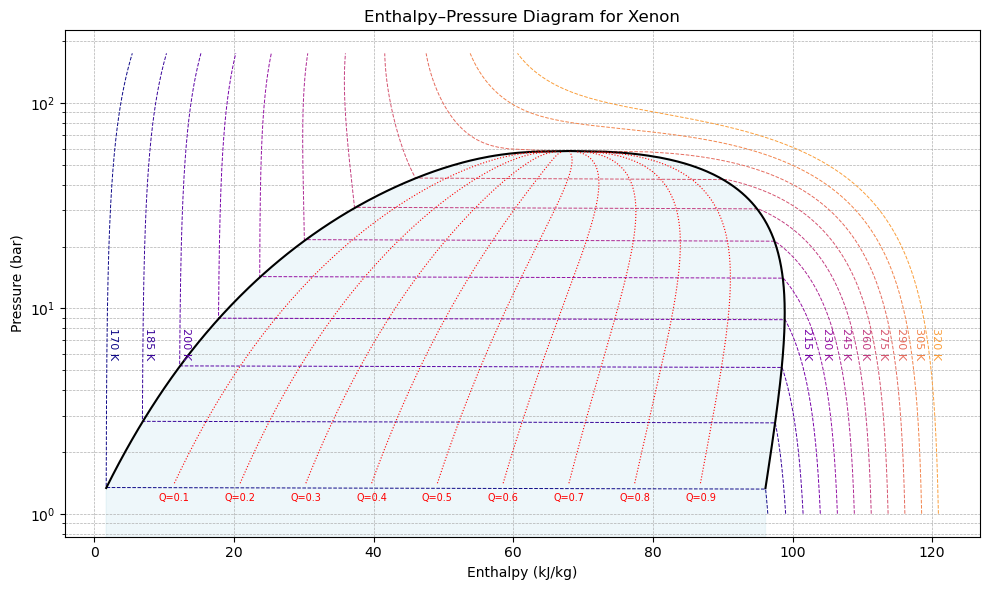

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from CoolProp.CoolProp import PropsSI

fluid = 'Xenon'  # CoolProp name for N2O

# Pressure range: from 1e4 Pa (0.1 bar) to near-critical pressure
p_min = 1e5
p_max = PropsSI('PCRIT', fluid) * 2.99  
pressures = np.logspace(np.log10(p_min), np.log10(p_max), 300)  # Pa

# Temperature range for plotting
T_min = PropsSI('TMIN', fluid) + 1
# rounf T_min up to next 10
T_min = np.ceil(T_min / 10) * 10

T_max = PropsSI('TCRIT', fluid) - 1
# round T_max up to next 10
T_max = np.floor(T_max / 10) * 10 + 50

temperatures = np.linspace(T_min, T_max, 300)

# Create meshgrid for plotting isotherms
plt.figure(figsize=(10, 6))

# Plot isotherms
# Colormap: e.g., 'plasma', 'viridis', 'coolwarm', 'inferno'
cmap = plt.colormaps['plasma']
norm = colors.Normalize(vmin=T_min, vmax=T_max*1.1)

# Plot isotherms with heatmap coloring in steps of 25C

for T in np.arange(T_min, T_max+1, 15):
    h_vals = []
    p_vals = []
    for p in pressures:
        try:
            h = PropsSI('H', 'T', T, 'P', p, fluid)
            h_vals.append(h / 1000)
            p_vals.append(p / 1e5)
        except:
            continue
    color = cmap(norm(T))
    plt.plot(h_vals, p_vals, color=color, linestyle='--', lw=0.7)
    idx = min(100, len(h_vals)-1)
    plt.text(h_vals[idx]+0.2, p_vals[idx], f'{T:.0f} K', color=color,
             fontsize=8, ha='left', va='bottom', rotation=-90)

# Plot saturation curve
Tsat = np.linspace(T_min, T_max, 300)
hL = []
hV = []
psat = []

for T in Tsat:
    try:
        p = PropsSI('P', 'T', T, 'Q', 0, fluid)
        h_liq = PropsSI('H', 'T', T, 'Q', 0, fluid)
        h_vap = PropsSI('H', 'T', T, 'Q', 1, fluid)
        hL.append(h_liq / 1000)
        hV.append(h_vap / 1000)
        psat.append(p / 1e5)
    except:
        continue

# Append critical point manually
T_crit = PropsSI('TCRIT', fluid)
p_crit = PropsSI('PCRIT', fluid)
h_crit = PropsSI('H', 'T', T_crit, 'Q', 0.5, fluid)  # mid-point of dome
hL.append(h_crit / 1000)
hV.append(h_crit / 1000)
psat.append(p_crit / 1e5)

h_closed = hL + hV[::-1]
p_closed = psat + psat[::-1]

plt.plot(h_closed, p_closed, 'k-', lw=1.5)  # Closed saturation curve
plt.fill_between(h_closed, p_closed, color='lightblue', alpha=0.2, zorder=0)

# Vapor quality lines (Q = 0.1 to 0.9)
qualities = np.linspace(0.1, 0.9, 9)
Tsat_q = np.linspace(T_min + 1, T_max - 1, 300)  # Slightly inside the dome

for Q in qualities:
    h_q = []
    p_q = []
    for T in Tsat_q:
        try:
            h = PropsSI('H', 'T', T, 'Q', Q, fluid)
            p = PropsSI('P', 'T', T, 'Q', Q, fluid)
            h_q.append(h / 1000)  # kJ/kg
            p_q.append(p / 1e5)   # bar
        except:
            continue
    plt.plot(h_q, p_q, color='red', linestyle=':', lw=0.8)
    # Label each Q line at the **bottom** (low-T, low-P)
    if h_q and p_q:
        plt.text(h_q[0], 0.9*p_q[0], f'Q={Q:.1f}', fontsize=7,
                 color='red', ha='center', va='top', rotation=0)

plt.yscale('log')
plt.xlabel('Enthalpy (kJ/kg)')
plt.ylabel('Pressure (bar)')
plt.title('Enthalpy–Pressure Diagram for ' + fluid)
plt.grid(True, which="both", ls="--", lw=0.5)
#plt.legend()
plt.tight_layout()
plt.show()